In [1]:
#Importer les librairies necessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics

%matplotlib inline

In [2]:
dataset=pd.read_csv("Modified_Hand_Gesture_Recognition_Dataset.csv")
dataset.shape

(300, 29)

In [3]:
#remove Gesture_Class and Gesture_Name columns
data=dataset.iloc[:,:-2].values
data

array([[  0, -20,  -6, ...,   3,   3,   5],
       [  1, -17,  -3, ...,   7,  -2,   3],
       [  2, -12,   5, ...,   2,   2,  -1],
       ...,
       [297,  12, -11, ...,   0,   0,   0],
       [298,   7, -10, ...,   0,   0,   0],
       [299,  11, -16, ...,   0,   0,   0]], dtype=int64)

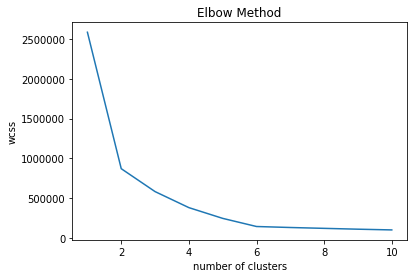

In [4]:
from sklearn.cluster import KMeans
#trouver le nombre optimal de clusters utilisant within-cluster sums of squares (wcss)
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(data)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

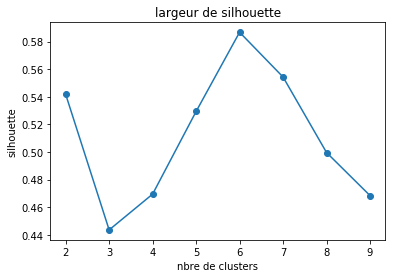

In [5]:
silhouettes=[]
for num_clusters in range(2,10):
    cls=KMeans(n_clusters=num_clusters,init='k-means++',max_iter=300,n_init=10,random_state=0)
    cls.fit(data)
    silh=metrics.silhouette_score(data,cls.labels_)
    silhouettes.append(silh)
plt.plot(range(2,10),silhouettes,marker='o')
plt.title("largeur de silhouette")
plt.xlabel("nbre de clusters")
plt.ylabel("silhouette")
plt.show()

In [6]:
km2=KMeans(n_clusters=6,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=km2.fit_predict(data)
y_means

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

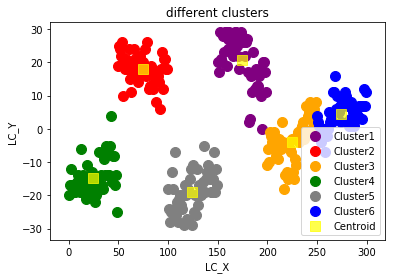

In [7]:
data=dataset.iloc[:,:-2].values
plt.scatter(data[y_means==0,0],data[y_means==0,1],s=100,c="purple",label="Cluster1")
plt.scatter(data[y_means==1,0],data[y_means==1,1],s=100,c="red",label="Cluster2")
plt.scatter(data[y_means==2,0],data[y_means==2,1],s=100,c="orange",label="Cluster3")
plt.scatter(data[y_means==3,0],data[y_means==3,1],s=100,c="green",label="Cluster4")
plt.scatter(data[y_means==4,0],data[y_means==4,1],s=100,c="grey",label="Cluster5")
plt.scatter(data[y_means==5,0],data[y_means==5,1],s=100,c="blue",label="Cluster6")
plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1],s=100,marker="s",c="yellow",alpha=0.7,label="Centroid")
plt.title("different clusters")
plt.xlabel("LC_X")
plt.ylabel("LC_Y")
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import classification_report
target_original=dataset.iloc[:,-2]
target_predicted_relabel = np.choose(km2.labels_,[3,1,4,0,2,5]).astype(np.int64)
print(classification_report(target_original,target_predicted_relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        50
           5       1.00      1.00      1.00        50

   micro avg       1.00      1.00      1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

